In [2]:
library(data.table)
dl.data = fread('npm_dl_10k.csv', sep = ',', header = T)
issue.data = fread('issue_10k_timeline.csv', sep = ',', header = T)
common.pkg = intersect(dl.data$Package.Name, issue.data$Package)
length(common.pkg)

[1] 4430

In [3]:
issue.data = issue.data[issue.data$Package %in% common.pkg, ]
issue.data = issue.data[order(issue.data$Package), ]
dl.data = dl.data[dl.data$Package %in% common.pkg, ]
dl.data = dl.data[order(dl.data$Package), ]


In [28]:
issue.data[issue.data$Package == 'blueimp-md5',]

Package,2015-03-01,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-07,2015-03-08,2015-03-09,...,2018-08-22,2018-08-23,2018-08-24,2018-08-25,2018-08-26,2018-08-27,2018-08-28,2018-08-29,2018-08-30,2018-08-31
blueimp-md5,5,5,5,5,5,5,5,5,5,...,18,18,18,18,18,18,18,18,18,18


In [4]:
dates = as.Date(as.character(colnames(issue.data)[-1]))

In [5]:
lmp <- function (modelobject) {
  if (class(modelobject) != "lm") stop("Not an object of class 'lm' ")
  f <- summary(modelobject)$fstatistic
    p <- pf(f[1],f[2],f[3],lower.tail=F)
    attributes(p) <- NULL
    return(p)
    }
options(warn=-1)


In [6]:
res = data.frame(i=0, cof = 0, rsq=0, pval=0)
res.d = data.frame(i=0, cof = 0, rsq=0, pval=0)
res.l = data.frame(i=0, cof = 0, rsq=0, pval=0)


for (i in 1:nrow(dl.data)){
    m = (lm(unlist(issue.data[i,-1]) ~  unlist(dl.data[i,-1])))
    res = rbind(res, c(i, m$coefficients[2], summary(m)$r.squared, lmp(m)))
    m = (lm(unlist(issue.data[i,-1]) ~  dates + unlist(dl.data[i,-1])))
    res.d = rbind(res.d, c(i, m$coefficients[3], summary(m)$r.squared, lmp(m)))
    m = (lm(log(unlist(issue.data[i,-1])+1) ~  log(unlist(dl.data[i,-1])+1)))
    res.l = rbind(res.l, c(i, m$coefficients[2], summary(m)$r.squared, lmp(m)))

    
}
res = res[-1,]
res.d = res.d[-1,]
res.l = res.l[-1,]

In [7]:
summary(res)
summary(res.d)
summary(res.l)

       i             cof                  rsq              pval         
 Min.   :   1   Min.   :-0.3344647   Min.   :0.0000   Min.   :0.000000  
 1st Qu.:1108   1st Qu.: 0.0000419   1st Qu.:0.3501   1st Qu.:0.000000  
 Median :2216   Median : 0.0003302   Median :0.4982   Median :0.000000  
 Mean   :2216   Mean   : 0.0274239   Mean   :0.4583   Mean   :0.003184  
 3rd Qu.:3323   3rd Qu.: 0.0040826   3rd Qu.:0.5923   3rd Qu.:0.000000  
 Max.   :4430   Max.   : 1.8697926   Max.   :0.8637   Max.   :0.999462  
                                     NA's   :17       NA's   :17        

       i             cof                  rsq               pval      
 Min.   :   1   Min.   :-0.1215440   Min.   :0.01919   Min.   :0e+00  
 1st Qu.:1108   1st Qu.:-0.0000247   1st Qu.:0.81868   1st Qu.:0e+00  
 Median :2216   Median : 0.0000007   Median :0.91948   Median :0e+00  
 Mean   :2216   Mean   : 0.0045659   Mean   :0.86701   Mean   :0e+00  
 3rd Qu.:3323   3rd Qu.: 0.0000818   3rd Qu.:0.97114   3rd Qu.:0e+00  
 Max.   :4430   Max.   : 0.4621868   Max.   :0.99944   Max.   :4e-06  
                                     NA's   :17        NA's   :17     

       i             cof               rsq                pval         
 Min.   :   1   Min.   :-0.6767   Min.   :0.000001   Min.   :0.000000  
 1st Qu.:1108   1st Qu.: 0.1027   1st Qu.:0.426726   1st Qu.:0.000000  
 Median :2216   Median : 0.1790   Median :0.674742   Median :0.000000  
 Mean   :2216   Mean   : 0.2194   Mean   :0.610445   Mean   :0.003043  
 3rd Qu.:3323   3rd Qu.: 0.3055   3rd Qu.:0.828075   3rd Qu.:0.000000  
 Max.   :4430   Max.   : 1.8327   Max.   :0.993268   Max.   :0.978110  
                                  NA's   :18         NA's   :18        

In [8]:
length(which(res$pval > 0.05))

[1] 36

In [16]:
sd(!(is.na(res.d$rsq)))

[1] 0.06183534

In [10]:
length(which(res[-1,]$cof < 0))

[1] 94

In [11]:
length(which(res.d[-1,]$cof < 0))

[1] 2030

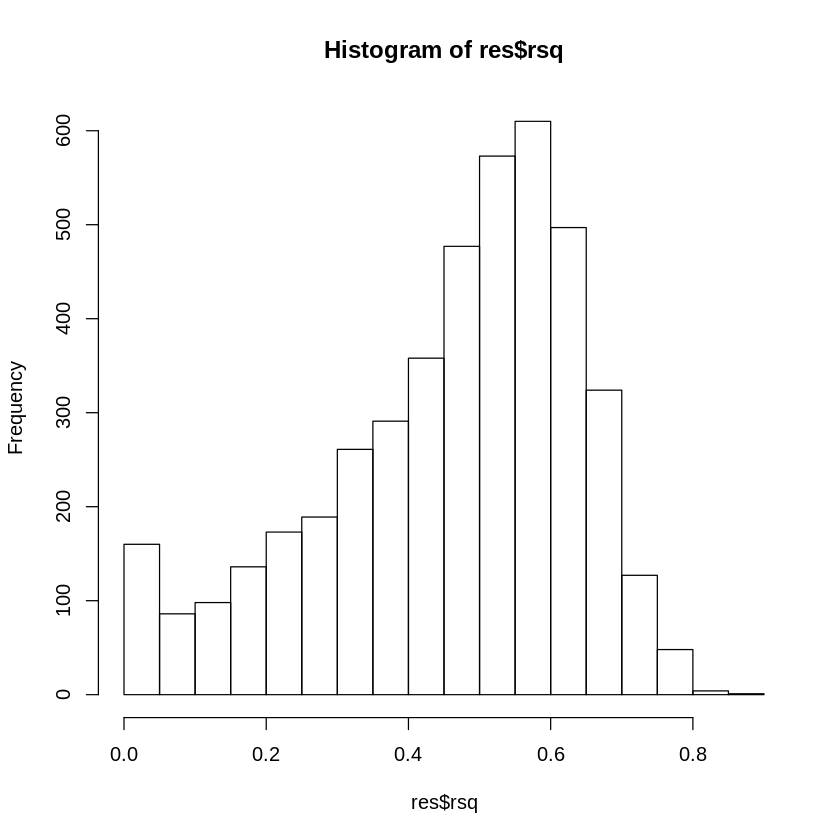

In [13]:
hist(res$rsq)

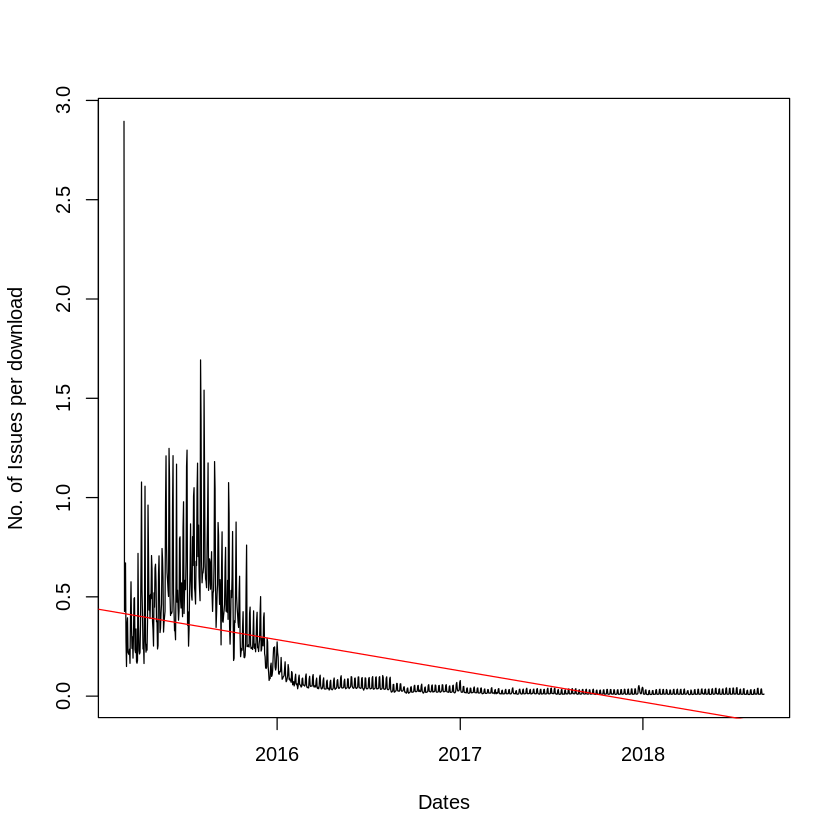

In [76]:
dlpd = (unlist(issue.data[i,-1]) / unlist(dl.data[i,-1]))
plot(dates, dlpd, type='l', ylab='No. of Issues per download', xlab = 'Dates')
abline(lm(dlpd~dates), col='Red')

In [156]:
setwd('~/work/npms/issues/plots')
r = list()

for (i in 1:nrow(dl.data)){
    if (length(grep('@', unlist(issue.data[i,1]))) != 0) {next}
    r[[i]] =  (unlist(issue.data[i,-1]) / unlist(dl.data[i,-1]))
    #png(paste0(gsub('[@/]', '', unlist(issue.data[i,1])), '.png'))
    #plot(dates, r[[i]], type='l', ylab='No. of Issues per download', xlab = 'Dates')    
    #try(abline(lm(r[[i]]~dates), col='Red'))
    #dev.off()
}
setwd('~/work/npms/issues')


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0002   0.0022   0.5822   0.0200 857.7692 

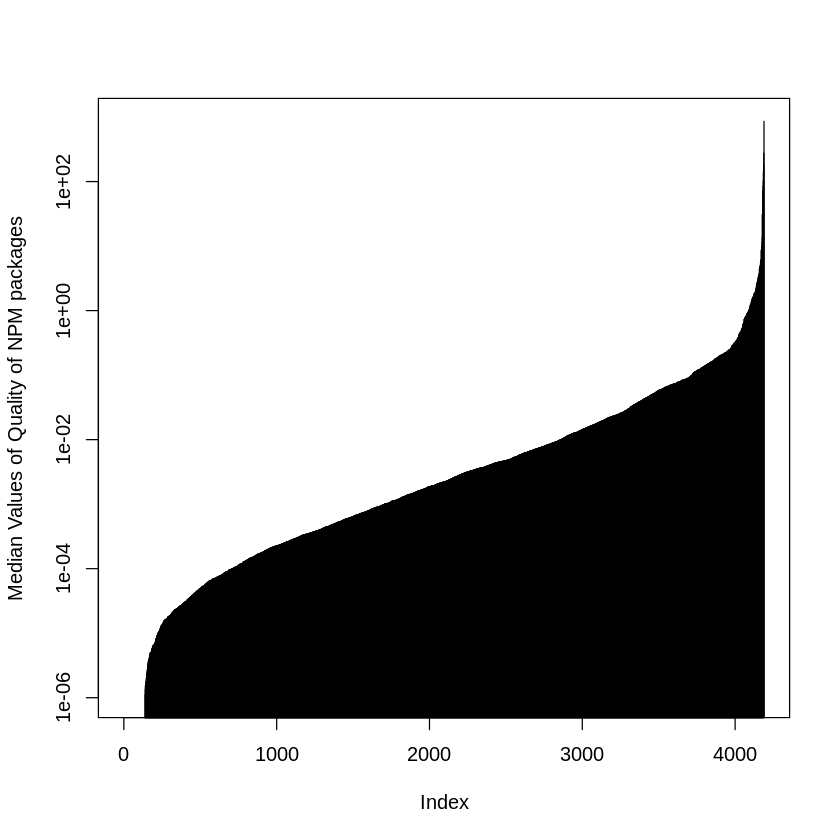

In [180]:
q.med = lapply(r, median, na.rm=T)
q.med = unlist(lapply(q.med, function(x) replace(x, is.infinite(x),NA)))
q.med <- (q.med[!is.na(q.med)])

summary(q.med)
plot(sort(q.med), log='y', type='h', ylab='Median Values of Quality of NPM packages')

In [181]:
length(which(q.med>1))

[1] 100

In [183]:
unlist(issue.data[which(q.med>1),1])

Package1 
                                     "@concordance/react" 
                                                 Package2 
                                          "@ngrx/effects" 
                                                 Package3 
                                            "@ngrx/store" 
                                                 Package4 
                                   "@ngrx/store-devtools" 
                                                 Package5 
                                       "@ngtools/webpack" 
                                                 Package6 
                                     "@protobufjs/base64" 
                                                 Package7 
                               "@protobufjs/eventemitter" 
                                                 Package8 
                                      "@protobufjs/fetch" 
                                                 Package9 
                                      "@protobufjs/float" 
                                                Package10 
                                    "@protobufjs/inquire" 
                                                Package11 
                                       "@protobufjs/pool" 
                                                Package12 
                                          "@storybook/ui" 
                                                Package13 
                                    "@types/react-native" 
                                                Package14 
                                     "@types/react-redux" 
                                                Package15 
                                                "address" 
                                                Package16 
                                       "append-transform" 
                                                Package17 
                                             "array-find" 
                                                Package18 
                                       "array-find-index" 
                                                Package19 
                                              "array-ify" 
                                                Package20 
                                            "array-index" 
                                                Package21 
                                          "array-iterate" 
                                                Package22 
                                         "array-parallel" 
                                                Package23 
                        "babel-helper-bindify-decorators" 
                                                Package24 
"babel-helper-builder-binary-assignment-operator-visitor" 
                                                Package25 
                         "babel-helper-builder-react-jsx" 
                                                Package26 
                              "broccoli-babel-transpiler" 
                                                Package27 
                                             "bs-recipes" 
                                                Package28 
                                               "bubleify" 
                                                Package29 
                                              "d3-random" 
                                                Package30 
                                         "ember-wormhole" 
                                                Package31 
                                        "enzyme-matchers" 
                                                Package32 
                                           "es6-weak-map" 
                                                Package33 
                                 "eslint-config-prettier" 
                                                Package34 
                                         "exports-loader" 
                                     

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0001673 0.0102976 0.0025782 1.5594610 

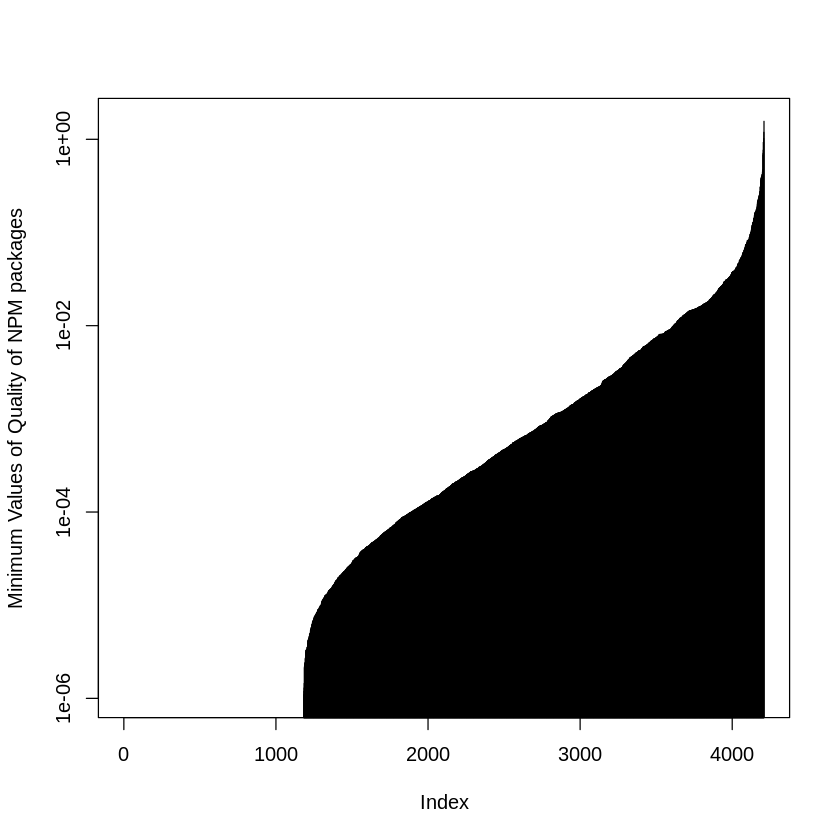

In [185]:
q.min = lapply(r, min, na.rm=T)
q.min = unlist(lapply(q.min, function(x) replace(x, is.infinite(x),NA)))
q.min <- (q.min[!is.na(q.min)])

summary(q.min)
plot(sort(q.min), log='y', type='h', ylab='Minimum Values of Quality of NPM packages')

In [188]:
length(which(q.min>1))
unlist(issue.data[which(q.min>1),1])

[1] 3

Package1              Package2              Package3 
        "@ngrx/store"   "@protobufjs/fetch" "@protobufjs/inquire"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    0.001    0.010    4.479    0.099 4335.100 

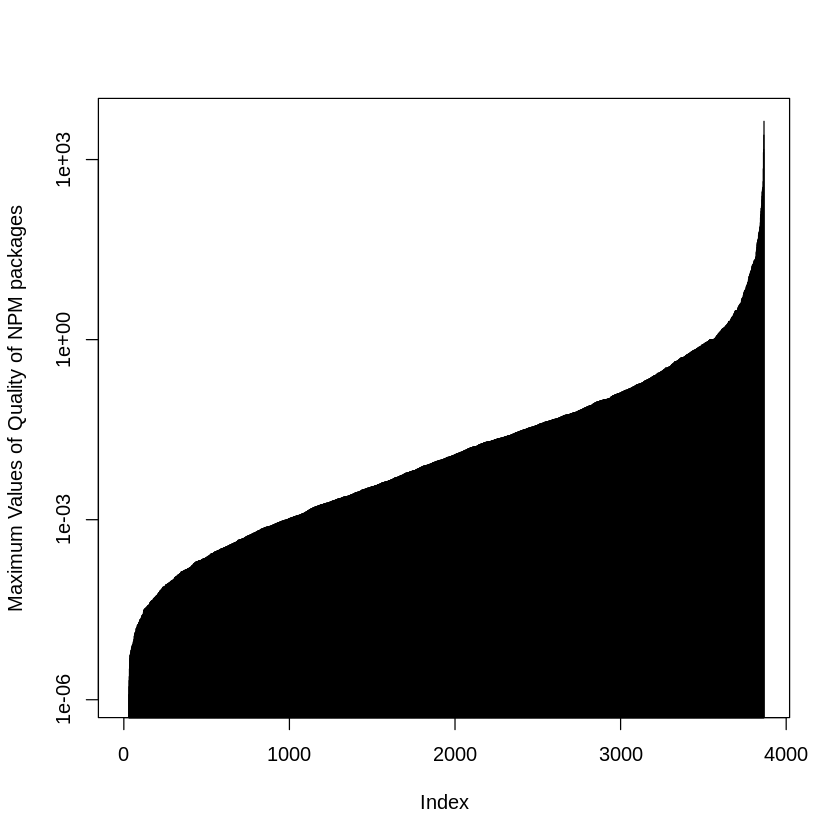

In [191]:
q.max = lapply(r, quantile, 0.9, na.rm=T)
q.max = unlist(lapply(q.max, function(x) replace(x, is.infinite(x),NA)))
q.max <- (q.max[!is.na(q.max)])

summary(q.max)
plot(sort(q.max), log='y', type='h', ylab='Maximum Values of Quality of NPM packages')

In [192]:
length(which(q.max>1))
unlist(issue.data[which(q.max>1),1])

[1] 304

Package1 
                                         "@glimmer/di" 
                                              Package2 
                               "@mcrowe/html-purifier" 
                                              Package3 
                          "@ng-bootstrap/ng-bootstrap" 
                                              Package4 
                                       "@ngrx/effects" 
                                              Package5 
                                         "@ngrx/store" 
                                              Package6 
                                "@ngrx/store-devtools" 
                                              Package7 
                                "@ngtools/json-schema" 
                                              Package8 
                                    "@ngtools/webpack" 
                                              Package9 
                                  "@protobufjs/base64" 
                                             Package10 
                                 "@protobufjs/codegen" 
                                             Package11 
                            "@protobufjs/eventemitter" 
                                             Package12 
                                   "@protobufjs/fetch" 
                                             Package13 
                                   "@protobufjs/float" 
                                             Package14 
                                 "@protobufjs/inquire" 
                                             Package15 
                                    "@protobufjs/path" 
                                             Package16 
                               "@storybook/components" 
                                             Package17 
                                   "@types/babel-core" 
                                             Package18 
                              "@types/babel-generator" 
                                             Package19 
                                  "@types/babel-types" 
                                             Package20 
                                "@types/cookie-parser" 
                                             Package21 
                                 "@types/react-router" 
                                             Package22 
                                       "@types/rimraf" 
                                             Package23 
                                         "@types/spdy" 
                                             Package24 
                          "@types/undertaker-registry" 
                                             Package25 
                                          "JSONSelect" 
                                             Package26 
                                               "acorn" 
                                             Package27 
                                           "acorn-jsx" 
                                             Package28 
                               "ansi-escape-sequences" 
                                             Package29 
                                          "ansistyles" 
                                             Package30 
                                                "antd" 
                                             Package31 
                                      "any-observable" 
                                             Package32 
                                         "any-promise" 
                                             Package33 
                                 "aot-test-generators" 
                                             Package34 
                                      "array-extended" 
                                             Package35 
                                   "array-to-sentence" 
                                             Package36 
                                            "auth0-js" 
              

In [55]:
m = do.call(cbind, r)
m[!is.finite(m)] <- NA

d = data.frame(m)
summary(d)

       X1               X2               X3                  X4          
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0002023   Min.   :0.000689  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0004591   1st Qu.:0.002546  
 Median :0.0004   Median :0.0000   Median :0.0007305   Median :0.005019  
 Mean   :0.0004   Mean   :0.0004   Mean   :0.0010392   Mean   :0.005818  
 3rd Qu.:0.0006   3rd Qu.:0.0005   3rd Qu.:0.0012295   3rd Qu.:0.007267  
 Max.   :0.0023   Max.   :0.0034   Max.   :0.0055759   Max.   :0.027564  
 NA's   :404      NA's   :936                          NA's   :1         
       X5                  X6                 X7                  X8          
 Min.   :0.0002567   Min.   :0.003558   Min.   :0.0005726   Min.   :0.002059  
 1st Qu.:0.0009258   1st Qu.:0.013449   1st Qu.:0.0009277   1st Qu.:0.003109  
 Median :0.0012419   Median :0.032092   Median :0.0011392   Median :0.004652  
 Mean   :0.0015140   Mean   :0.053693   Mean   :0.0016102   Mean   :0.010358  
 3rd Qu.:0.00

In [57]:
which(m == max(m, na.rm=T), arr.ind = TRUE)


,row,col
2016-11-25,636,1167


In [68]:
options(na.rm=T)
cm = unlist(lapply( d, pmax, na.rm=T))
summary(cm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.0     0.0     1.7     0.0 11046.0  509136 

In [71]:
cm2 = do.call(pmax, d)
summary(cm2)
sd(cm2, na.rm=T)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   1.789    3.155   12.755   92.740   40.674 3531.000     1025 

[1] 344.5426

In [58]:
issue.data[1167,1]

Package
d3-timer
